In [157]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report

In [102]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [103]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(768, 9)

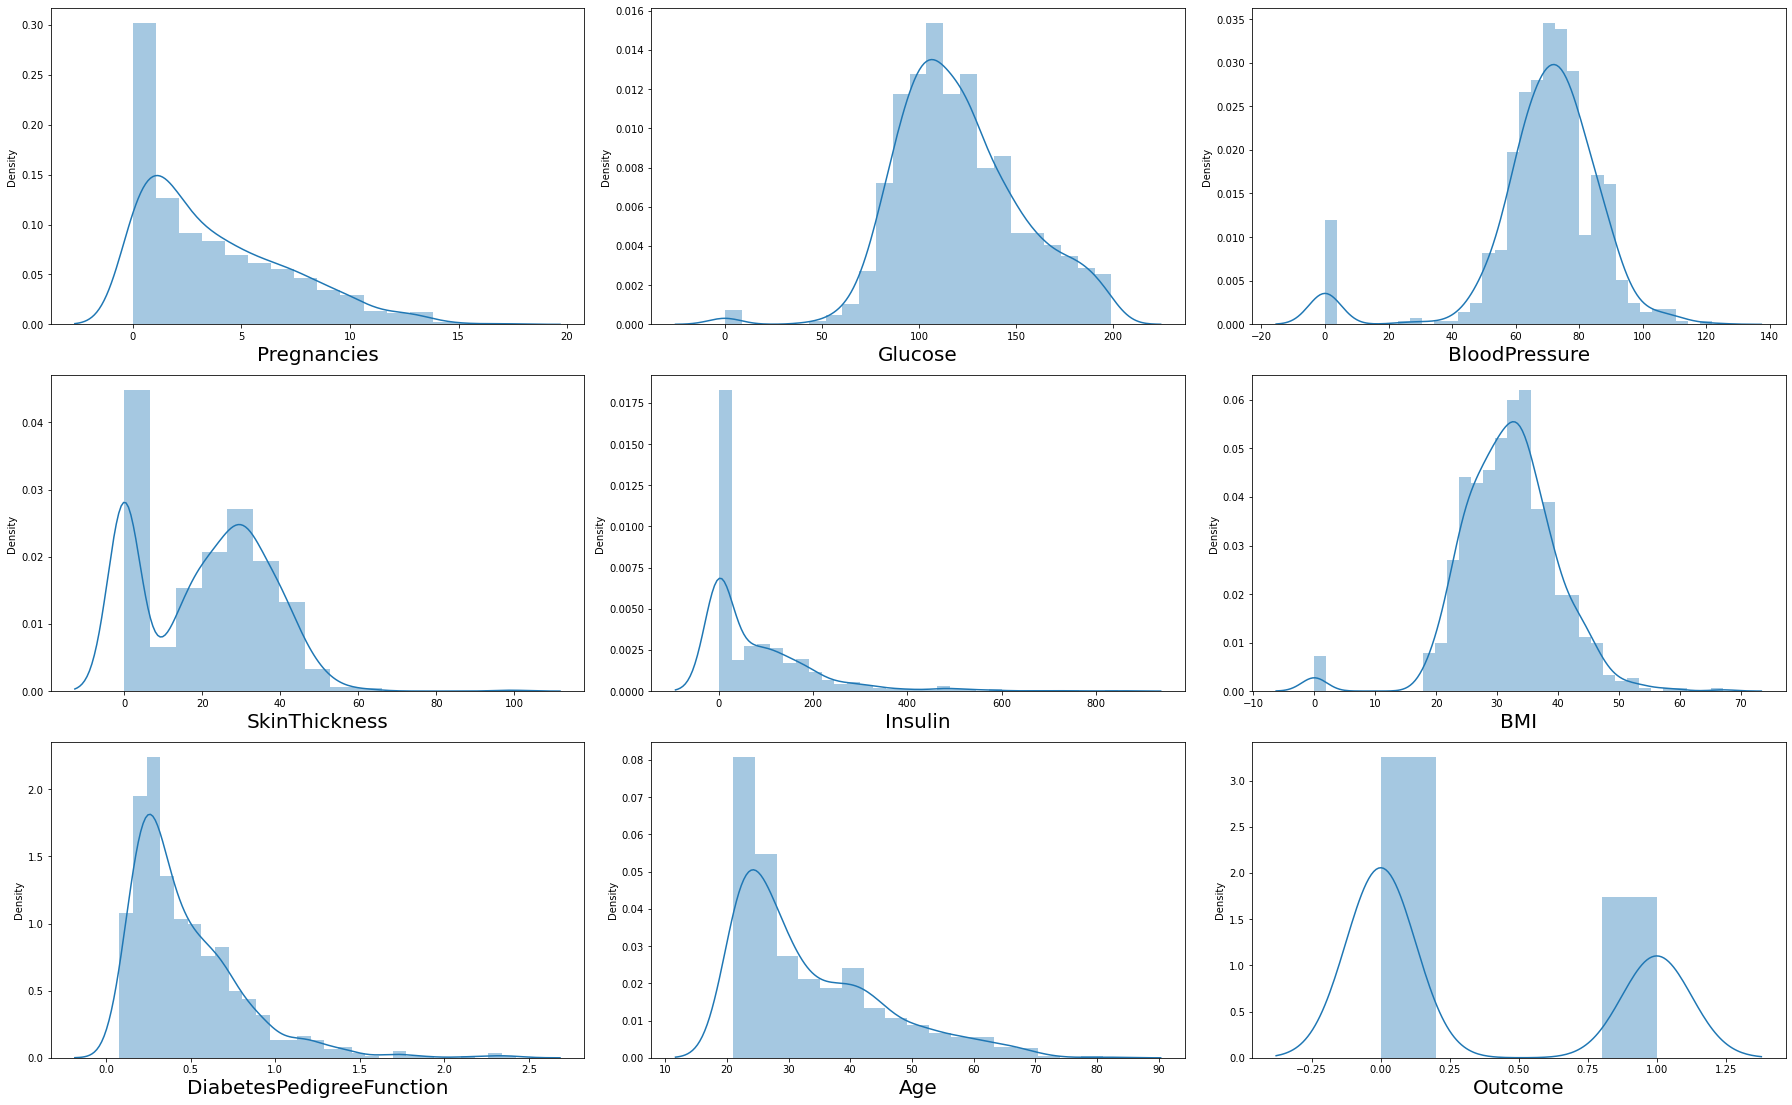

In [104]:

plt.figure(figsize=(25,20))
numb=1

for columns in data:
    if numb<=10:
        ax= plt.subplot(4,3,numb)
        sb.distplot(data[columns])
        plt.xlabel(columns,fontsize=20)
        
    numb+=1
plt.tight_layout()


import warnings
warnings.filterwarnings('ignore')



data.shape


In [105]:
np.where(data['Glucose']==0)

(array([ 75, 182, 342, 349, 502], dtype=int32),)

In [106]:
data['Glucose']= data['Glucose'].replace(0,data['Glucose'].mean())

In [107]:
np.where(data['BloodPressure']==0)

(array([  7,  15,  49,  60,  78,  81, 172, 193, 222, 261, 266, 269, 300,
        332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533,
        535, 589, 601, 604, 619, 643, 697, 703, 706], dtype=int32),)

In [108]:
data['BloodPressure']= data['BloodPressure'].replace(0,data['BloodPressure'].mean())

In [109]:
np.where(data['SkinThickness']==0)

(array([  2,   5,   7,   9,  10,  11,  12,  15,  17,  21,  22,  26,  29,
         33,  36,  41,  44,  46,  49,  58,  60,  61,  62,  64,  67,  72,
         76,  78,  81,  84,  90,  93, 100, 101, 102, 104, 106, 113, 115,
        116, 117, 123, 124, 129, 131, 138, 140, 143, 148, 151, 154, 164,
        167, 168, 170, 176, 178, 179, 180, 183, 184, 190, 192, 193, 196,
        201, 207, 219, 221, 222, 226, 230, 233, 235, 239, 242, 246, 250,
        251, 261, 264, 266, 268, 269, 272, 274, 278, 280, 283, 284, 294,
        299, 300, 303, 304, 317, 319, 327, 332, 333, 336, 337, 339, 343,
        344, 347, 350, 351, 354, 355, 361, 363, 366, 378, 391, 394, 398,
        400, 401, 404, 406, 407, 408, 418, 426, 430, 433, 435, 437, 439,
        443, 451, 453, 456, 461, 464, 468, 473, 474, 484, 489, 494, 495,
        496, 505, 509, 512, 513, 517, 518, 522, 523, 524, 529, 531, 533,
        535, 536, 537, 552, 557, 559, 560, 564, 570, 571, 577, 578, 583,
        586, 587, 589, 592, 596, 598, 601, 604, 615

In [110]:
data['SkinThickness']= data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [111]:
np.where(data['Insulin']==0)

(array([  0,   1,   2,   5,   7,   9,  10,  11,  12,  15,  17,  21,  22,
         23,  26,  29,  30,  33,  34,  36,  37,  38,  41,  42,  44,  45,
         46,  47,  48,  49,  55,  58,  60,  61,  62,  64,  65,  66,  67,
         72,  74,  75,  76,  77,  78,  79,  80,  81,  83,  84,  86,  89,
         90,  93,  96, 100, 101, 102, 104, 106, 113, 115, 116, 117, 118,
        121, 123, 124, 129, 131, 133, 138, 140, 141, 143, 145, 146, 148,
        149, 151, 154, 155, 160, 163, 164, 166, 167, 168, 170, 172, 176,
        178, 179, 180, 183, 184, 185, 190, 192, 193, 194, 196, 200, 201,
        202, 205, 207, 209, 210, 211, 212, 218, 219, 221, 222, 226, 227,
        230, 233, 235, 237, 238, 239, 240, 242, 245, 246, 249, 250, 251,
        253, 255, 256, 257, 261, 262, 263, 264, 266, 267, 268, 269, 270,
        272, 274, 276, 278, 280, 283, 284, 294, 299, 300, 303, 304, 310,
        314, 317, 319, 321, 322, 324, 327, 330, 332, 333, 336, 337, 339,
        342, 343, 344, 347, 349, 350, 351, 352, 354

In [112]:
data['Insulin']= data['Insulin'].replace(0,data['Insulin'].mean())

In [113]:
np.where(data['BMI']==0)

(array([  9,  49,  60,  81, 145, 371, 426, 494, 522, 684, 706], dtype=int32),)

In [114]:
data['BMI']= data['BMI'].replace(0,data['BMI'].mean())

In [115]:
## distribution the columns 

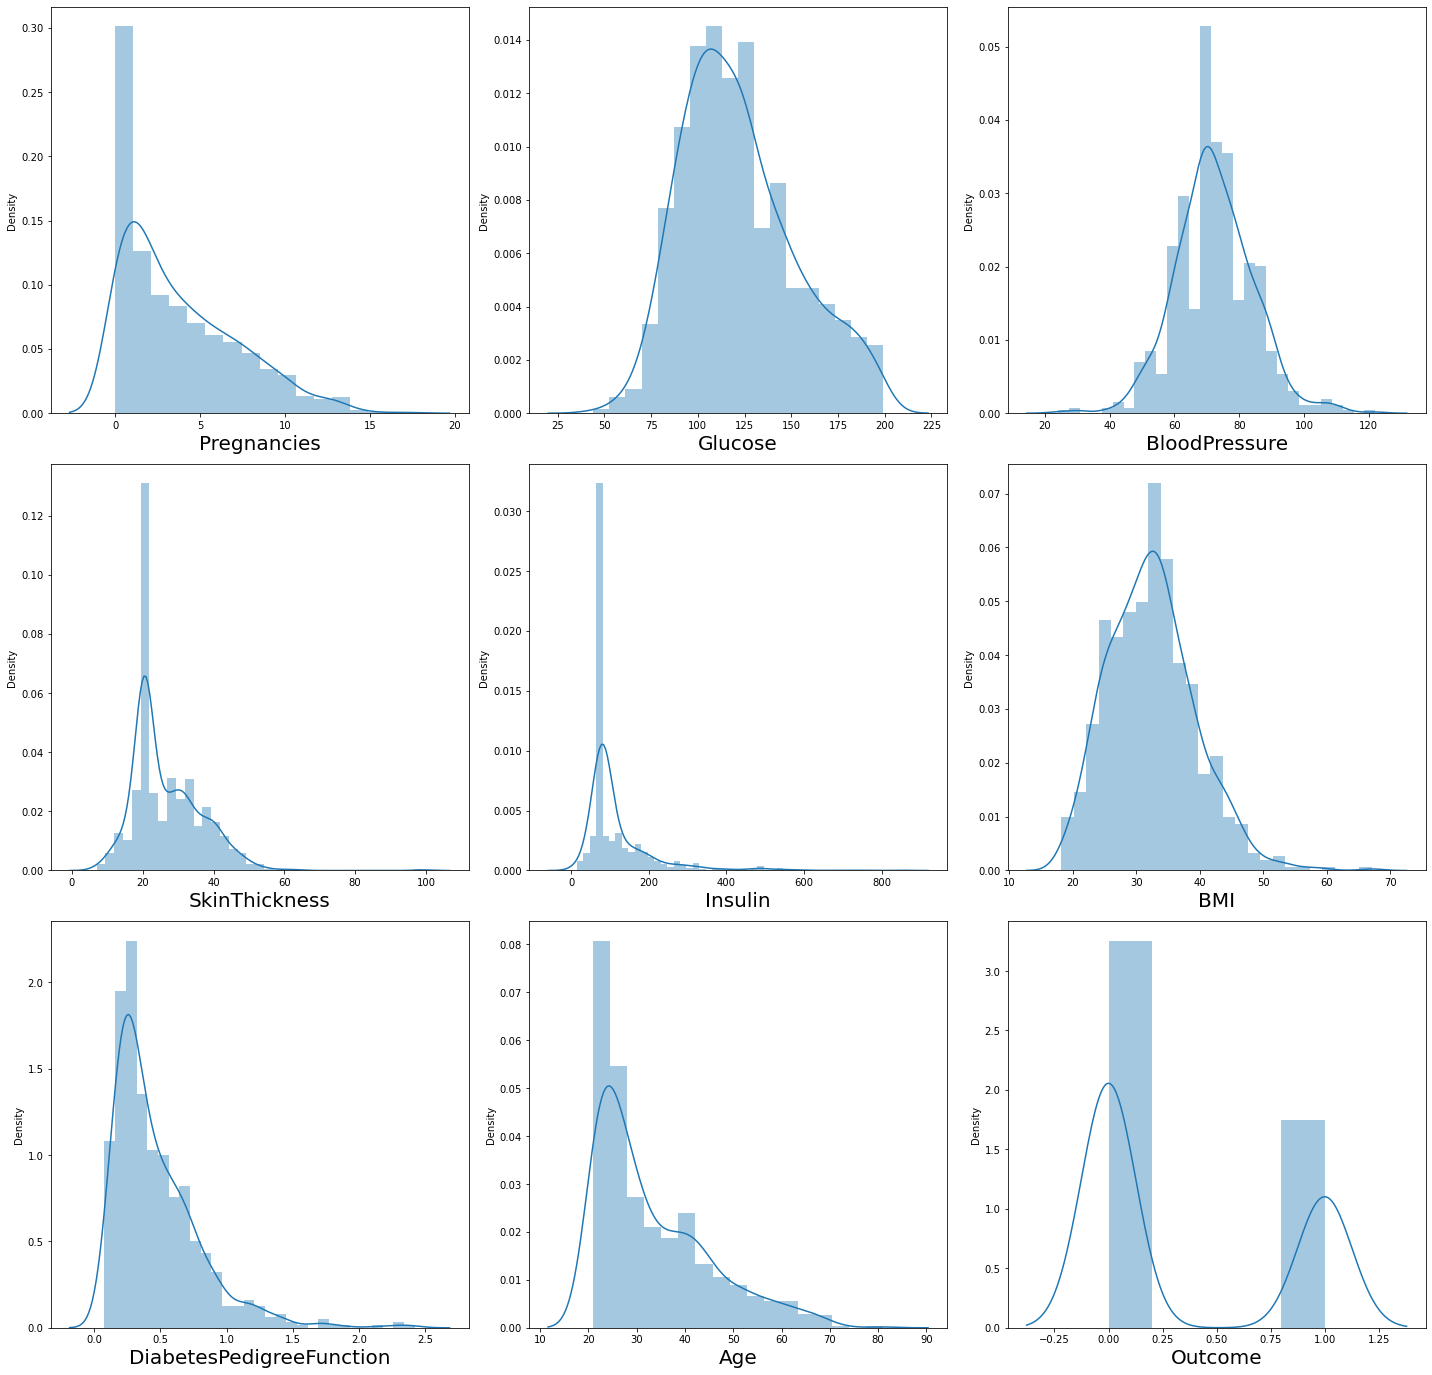

In [116]:
plt.figure(figsize=(20,25))
numb=1

for columns in data:
    if numb<=10:
        ax= plt.subplot(4,3,numb)
        sb.distplot(data[columns])
        plt.xlabel(columns,fontsize=20)
        
    numb+=1
plt.tight_layout()


import warnings
warnings.filterwarnings('ignore')

In [117]:
data.shape

(768, 9)

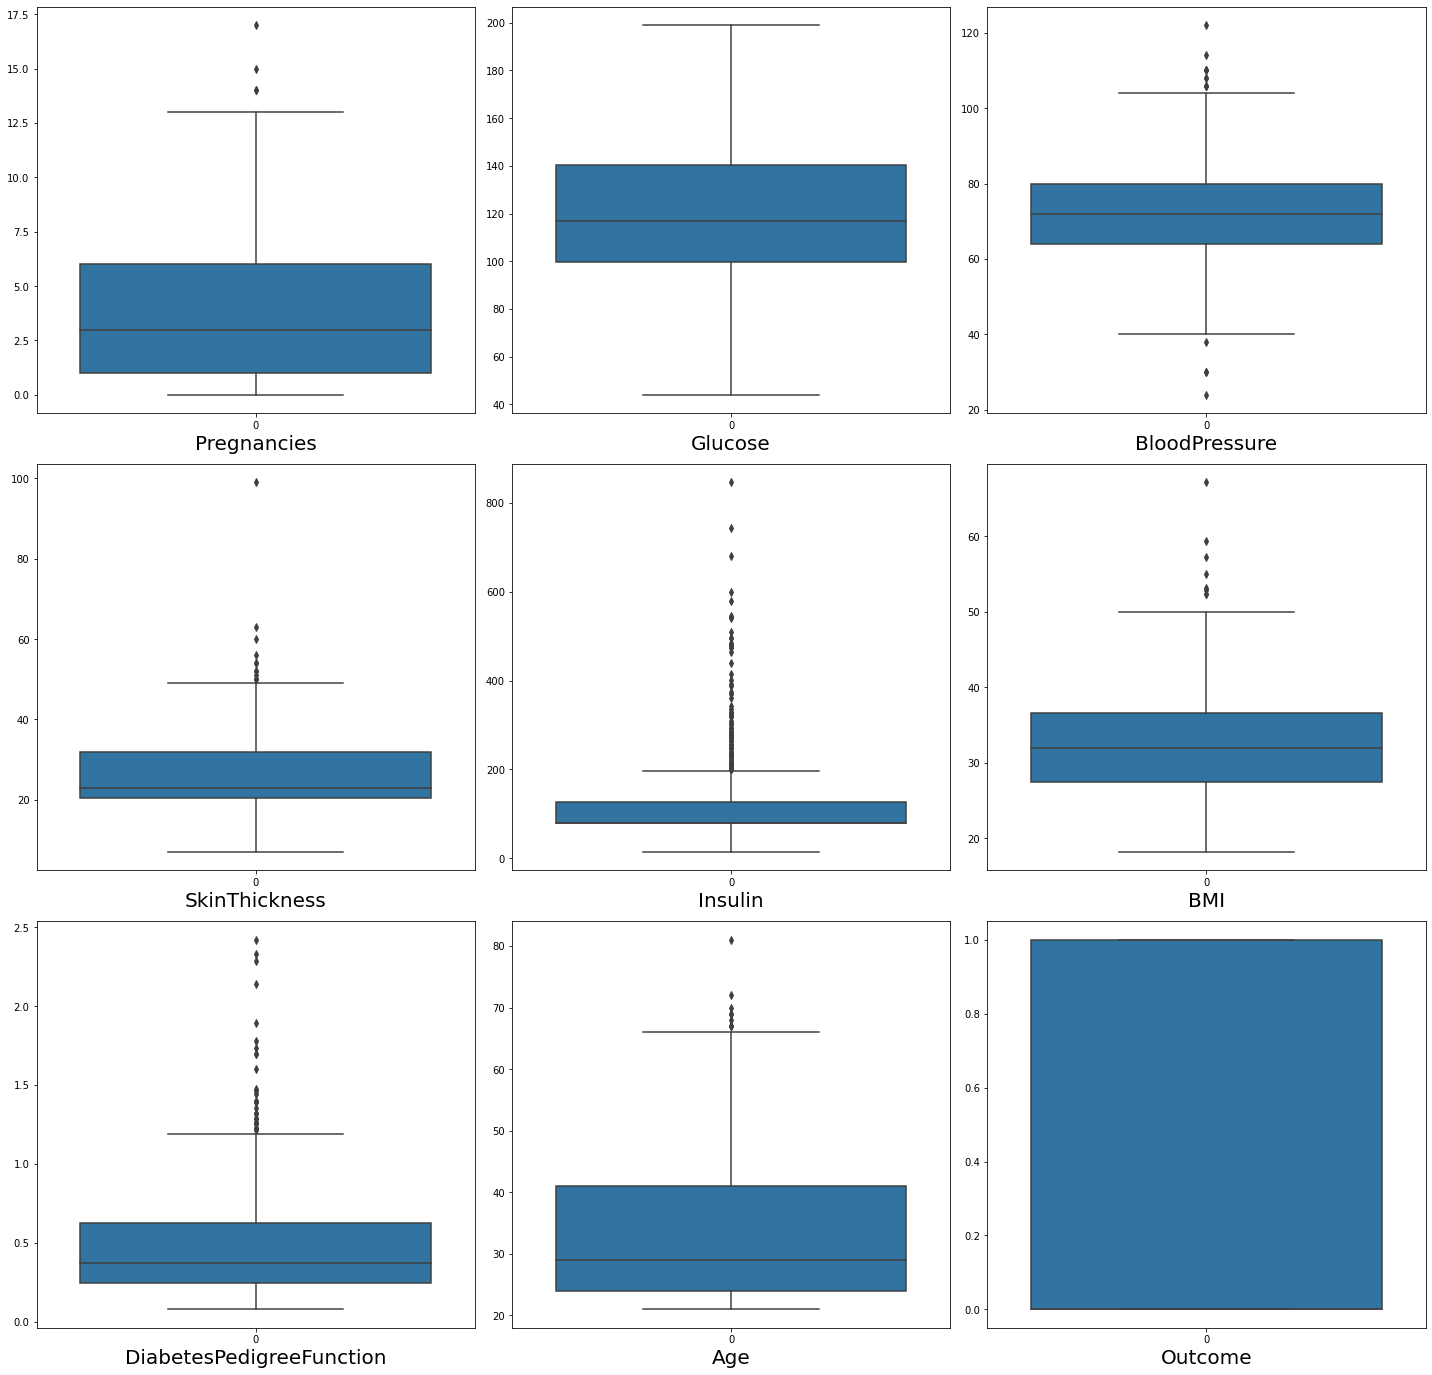

In [118]:
plt.figure(figsize=(20,25))
numb=1

for columns in data:
    if numb<=10:
        ax= plt.subplot(4,3,numb)
        sb.boxplot(data=data[columns])
        plt.xlabel(columns,fontsize=20)
        
    numb+=1
plt.tight_layout()


import warnings
warnings.filterwarnings('ignore')

In [119]:
q1=data.quantile(0.25)
q3= data.quantile(0.75)
iqr=q3-q1

In [120]:
pg_high=q3.Pregnancies + ( 1.5 * iqr.Pregnancies)
index=np.where(data['Pregnancies']>pg_high)
data= data.drop(data.index[index])
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [121]:
data.shape

(764, 9)

In [122]:
bp_high=q3.BloodPressure + ( 1.5 * iqr.BloodPressure)
index1=np.where(data['BloodPressure']>bp_high)
data= data.drop(data.index[index1])
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [123]:
data.shape

(754, 9)

In [124]:
sk_high=q3.SkinThickness + ( 1.5 * iqr.SkinThickness)
index2=np.where(data['SkinThickness']>sk_high)
data= data.drop(data.index[index2])
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [125]:
data.shape

(742, 9)

In [126]:
in_high=q3.Insulin+ ( 1.5 * iqr.Insulin)
index3=np.where(data['Insulin']>in_high)
data= data.drop(data.index[index3])
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [127]:
data.shape


(657, 9)

In [128]:
bm_high=q3.BMI + ( 1.5 * iqr.BMI)
index4=np.where(data['BMI']>bm_high)
data= data.drop(data.index[index4])
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [129]:
data.shape

(654, 9)

In [130]:
dbf_high=q3.DiabetesPedigreeFunction + ( 1.5 * iqr.DiabetesPedigreeFunction)
index5=np.where(data['DiabetesPedigreeFunction']>dbf_high)
data= data.drop(data.index[index5])
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [131]:
data.shape

(631, 9)

In [132]:
ag_high=q3.Age + ( 1.5 * iqr.Age)
index6=np.where(data['Age']>ag_high)
data= data.drop(data.index[index6])
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [133]:
data.shape


(622, 9)

In [134]:
bp_low=q1.BloodPressure - ( 1.5 * iqr.BloodPressure)
index8=np.where(data['BloodPressure']<bp_low)
index8

(array([ 13, 481, 483], dtype=int32),)

In [135]:
data= data.drop(data.index[index8])


In [136]:
data.shape

(619, 9)

In [137]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


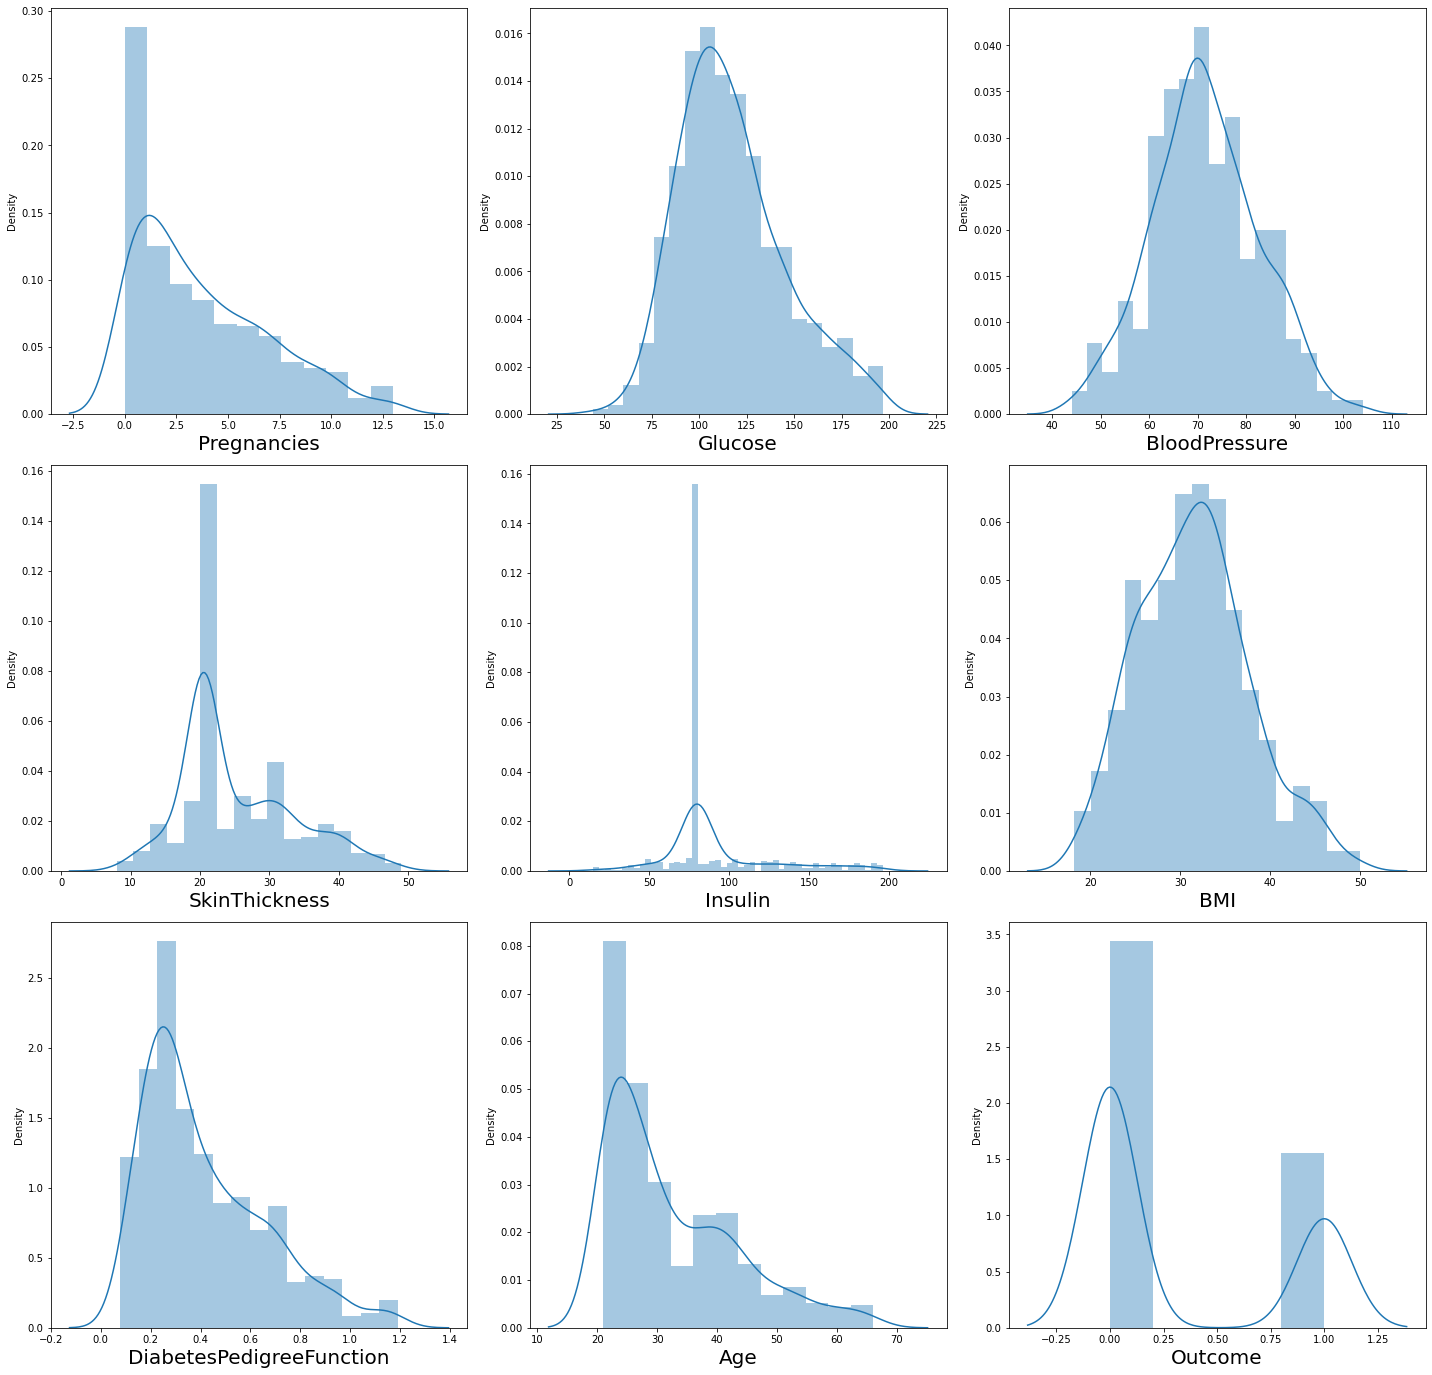

In [138]:
plt.figure(figsize=(20,25))
numb=1

for columns in data:
    if numb<=10:
        ax= plt.subplot(4,3,numb)
        sb.distplot(data[columns])
        plt.xlabel(columns,fontsize=20)
        
    numb+=1
plt.tight_layout()


import warnings
warnings.filterwarnings('ignore')

In [139]:
x=data.drop(columns='Outcome')
x
y=data['Outcome']
y


0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 619, dtype: int64

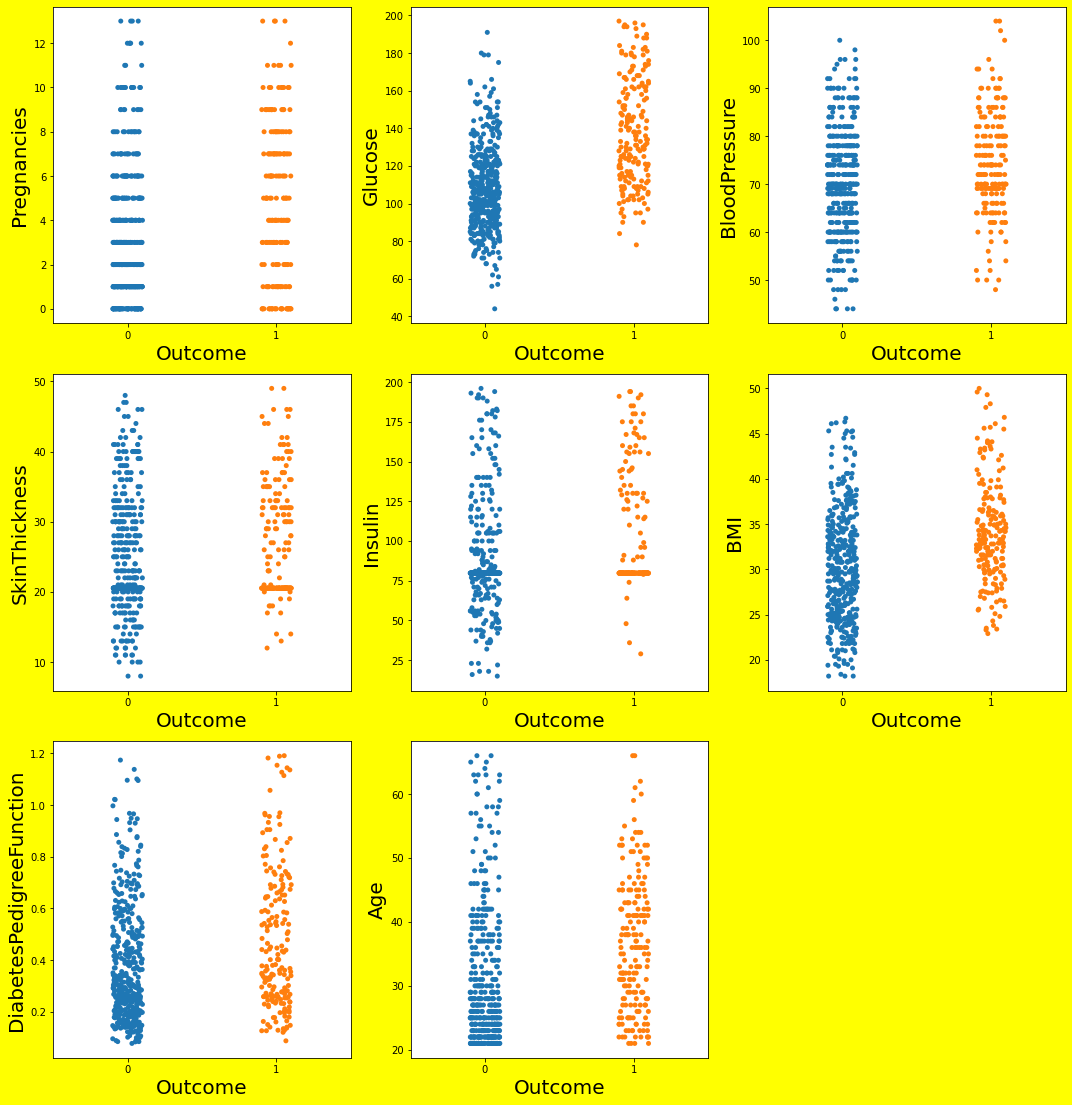

In [153]:
plt.figure(figsize=(15,20),facecolor='yellow')
numb=1

for columns in x:
    if numb<=10:
        ax= plt.subplot(4,3,numb)
        sb.stripplot(y,x[columns])
        plt.xlabel('Outcome',fontsize=20)
        plt.ylabel(columns,fontsize=20)
        
        
        
    numb+=1
plt.tight_layout()

In [ ]:
## scaling of the data is done in this to predict the data

In [141]:
scaled=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled


array([[ 0.68261737,  1.09175498,  0.03430374, ...,  0.3291024 ,
         0.86092316,  1.59493212],
       [-0.86628347, -1.14945302, -0.51362487, ..., -0.79544459,
        -0.26714798, -0.1367884 ],
       [ 1.3021777 ,  2.33687054, -0.69626775, ..., -1.32558817,
         1.0448478 , -0.04564521],
       ...,
       [ 0.3728372 ,  0.13123727,  0.03430374, ..., -0.85970442,
        -0.7003927 , -0.22793158],
       [-0.86628347,  0.30911092, -1.06155349, ..., -0.2331711 ,
        -0.27532241,  1.32150256],
       [-0.86628347, -0.86485518, -0.14833913, ..., -0.18497622,
        -0.4142877 , -0.86593388]])

In [148]:
x_scaled.shape[1]            # scaling is done and indexing is done where [1] index is find out 


8

In [179]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

## here the vif is used to cheak the features multicollinearity, relation b/w the feature.
## in that we shall drop irrelevent feature
## vif > 5 , or vif > 10 : depend on data size

,vif,features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


In [180]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y, test_size=0.25,random_state=555)

In [181]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [182]:
y_predict=reg.predict(x_test)
y_predict

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0], dtype=int64)

In [183]:
accuracy=accuracy_score(y_test,y_predict)
confus_mat= confusion_matrix(y_test,y_predict)
accuracy
confus_mat

array([[94, 10],
       [21, 30]], dtype=int64)

In [184]:
report=classification_report(y_test,y_predict)

print(report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       104
           1       0.75      0.59      0.66        51

    accuracy                           0.80       155
   macro avg       0.78      0.75      0.76       155
weighted avg       0.80      0.80      0.79       155



In [167]:
fpr,tpr,threshold = roc_curve(y_test,y_predict)
print(tpr,'\n',fpr,'\n',threshold)

[0.         0.58823529 1.        ] 
 [0.         0.09615385 1.        ] 
 [2 1 0]


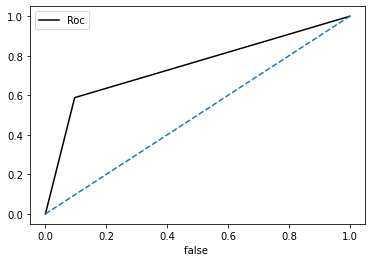

In [185]:
plt.plot(fpr,tpr,color='black',label='Roc')  ### receiver operating characteristics curve
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('false ')
plt.legend()
plt.show()

In [186]:
### auc curve-- area under the curve

auc_curve= roc_auc_score(y_test,y_predict)
auc_curve

0.7460407239819006

In [190]:
import pickle

In [199]:
filename='reg_dibeties'
pickle.dump(reg,open(filename,'wb'))

In [201]:
vb=pickle.load(open(filename,'rb'))

In [202]:
vb.predict(x_test)

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0], dtype=int64)